In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
acs = pd.read_csv('ACS16_NYC.csv')

In [8]:
acs.shape

(1840, 7)

In [9]:
acs.head()

,Unnamed: 0,census_tract,total_population,median_age,total_population_25yrsandover,total_bachelors_degree,median_income
0,1,Bronx_1,7503.0,32.1,303.0,0.7,10778.0
1,2,Bronx_2,5251.0,38.6,449.0,11.8,30760.0
2,3,Bronx_4,5980.0,39.4,300.0,14.3,32371.0
3,4,Bronx_16,6056.0,36.9,325.0,5.8,17848.0
4,5,Bronx_19,2682.0,32.5,227.0,13.7,21788.0


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [11]:
X = acs[['median_age', 'median_income', 'total_bachelors_degree', 'total_population']]

## Standard Scale

In [12]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## Cluster Analysis (K-Means)

### Find value of K

At 2 clusters, inertia is 5035.454513296303
At 3 clusters, inertia is 4128.065872756508
At 4 clusters, inertia is 3535.8709401639444
At 5 clusters, inertia is 3137.8110863850834
At 6 clusters, inertia is 2847.207029137343
At 7 clusters, inertia is 2623.2485616385784
At 8 clusters, inertia is 2457.170825043775
At 9 clusters, inertia is 2300.3185599750805


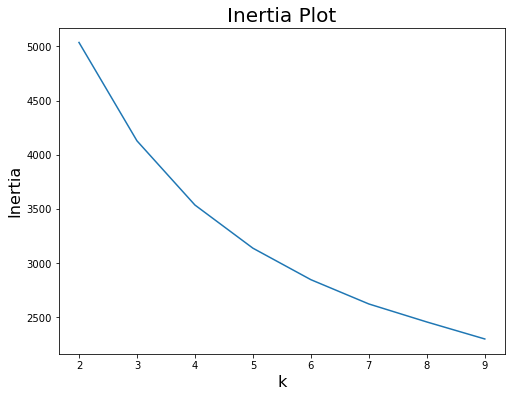

In [13]:
np.random.seed(42)
s = np.zeros(8)
for k in range(0, 8):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(X_std)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Inertia Plot', fontsize = 20)

## K=4 is optimal
K=4 is at the elbow of the score graph

In [14]:
cluster = KMeans(n_clusters = 4, n_init=100)
cluster.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
acs['clusterLabels'] = cluster.labels_

In [16]:
acs.clusterLabels.value_counts()

1    647
0    619
3    316
2    258
Name: clusterLabels, dtype: int64

## Investigate clusters' statistics

In [18]:
for i in range(0,4):
    group = acs[acs['clusterLabels'] == i]
    print('Group ' + str(i) + ':')
    print('    Group Size: ' + str(len(group)))
    print('    Population: ' + str(round(group.total_population.mean(),2)))
    print('    Median Age: ' + str(round(group.median_age.mean(),2)))
    print('    Median Income: ' + str(round(group.median_income.mean(),2)))
    print('    Percent with Bachelors Degree: ' + str(round(group.total_bachelors_degree.mean(),2)))

Group 0:
    Group Size: 619
    Population: 3185.1
    Median Age: 32.24
    Median Income: 22384.27
    Percent with Bachelors Degree: 13.2
Group 1:
    Group Size: 647
    Population: 2957.76
    Median Age: 42.05
    Median Income: 31556.87
    Percent with Bachelors Degree: 20.14
Group 2:
    Group Size: 258
    Population: 3363.31
    Median Age: 37.2
    Median Income: 48427.23
    Percent with Bachelors Degree: 33.06
Group 3:
    Group Size: 316
    Population: 6563.05
    Median Age: 33.97
    Median Income: 22272.1
    Percent with Bachelors Degree: 13.45


## Comments on Groups:


### Group 0:
- Youngest
- Least educated
- One of the least affluent

### Group 1:
- L
### Group 2:
- Youngest
- Low Income

### Group 3:
- Highest Education
- Lowest Population
- Highest Income

## Write data to .csv

In [17]:
acs.head()

,Unnamed: 0,census_tract,total_population,median_age,total_population_25yrsandover,total_bachelors_degree,median_income,percent_bachelorsdegree,clusterLabels
0,1,Bronx_1,7503.0,32.1,303.0,0.7,10778.0,0.231023,1
1,2,Bronx_2,5251.0,38.6,449.0,11.8,30760.0,2.628062,1
2,3,Bronx_4,5980.0,39.4,300.0,14.3,32371.0,4.766667,1
3,4,Bronx_16,6056.0,36.9,325.0,5.8,17848.0,1.784615,1
4,5,Bronx_19,2682.0,32.5,227.0,13.7,21788.0,6.035242,2


In [18]:
acs.to_csv('acsClusters.csv')